# Importation des librairies 

In [212]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
### arbre de décision
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.ensemble import RandomForestClassifier

# Importation des datasets

In [245]:
##importer les datasets

train = pd.read_csv('/Users/avicenne/Documents/python/kaggle/titanic/train.csv')
test = pd.read_csv('/Users/avicenne/Documents/python/kaggle/titanic/test.csv')


# On observe les données

In [214]:
print(len(train))
train.head()

891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [215]:
## pourcentage des valeurs manquantes par colonne
train.isna().sum()/len(train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [89]:
len(train.Ticket.unique())

681

In [90]:
train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [216]:
## on regroupe les prefixes des tickets pour observer une éventuelle corrélation

#----------------------- Train -------------------------------------------#

train['Ticket_Prefix'] = train['Ticket'].apply(lambda x: x[:1])  # Ajustez selon le critère souhaité
print(train['Ticket_Prefix'].value_counts())

#----------------------- Test -------------------------------------------#

test['Ticket_Prefix'] = test['Ticket'].apply(lambda x: x[:1])  # Ajustez selon le critère souhaité
print(test['Ticket_Prefix'].value_counts())

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_Prefix, dtype: int64
3    128
2     95
1     64
S     33
P     33
C     30
A     13
W      6
F      6
7      4
6      3
4      1
9      1
L      1
Name: Ticket_Prefix, dtype: int64


In [217]:
## pourcentage de personnes ayant survécus

train.Survived.value_counts()/len(train)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

# On va gérer les valeurs : Age, Cabin, Embarked

In [219]:
## pour l'âge on remplace par la moyenne

#----------------------- Train -------------------------------------------#
train.Age = train.Age.fillna(train.Age.mean())
print(train.Age.isna().any())

#----------------------- Test -------------------------------------------#
test.Age = test.Age.fillna(test.Age.mean())
print(test.Age.isna().any())


False
False


In [271]:
def categ_age(x):   #le max est autour de 80 ans
    for i in range(20):
        if i*5 < x <=(i+1)*5:
            return i
        
        
def categ_fare(x):  #le max est de 512
    for i in range(100):
        if i*20 <= x <(i+1)*20:
            return i

In [250]:
## On crée des catégories pour les âges

#----------------------- Train -------------------------------------------#

train['age_cat'] = train.Age.apply(lambda x : categ_age(x))

#----------------------- Test -------------------------------------------#

test['age_cat'] = test.Age.apply(lambda x : categ_age(x))

print(train.age_cat.value_counts())

4.0     122
5.0     108
3.0      96
6.0      88
7.0      67
8.0      47
0.0      44
9.0      39
10.0     24
1.0      20
2.0      19
11.0     18
12.0     14
14.0      4
13.0      3
15.0      1
Name: age_cat, dtype: int64


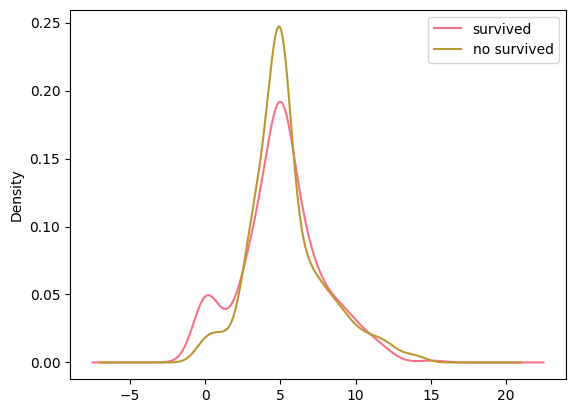

In [189]:
### on observe la répartition des classes en fonction de Survived

train[train.Survived == 1].age_cat.plot(kind = 'density')
train[train.Survived == 0].age_cat.plot(kind = 'density')
plt.legend(['survived', 'no survived'])

In [222]:
## De même pour Fare

#----------------------- Train -------------------------------------------#

train['fare_cat'] = train.Fare.apply(lambda x : categ_fare(x))

#----------------------- Test -------------------------------------------#

test['fare_cat'] = test.Fare.apply(lambda x : categ_fare(x))


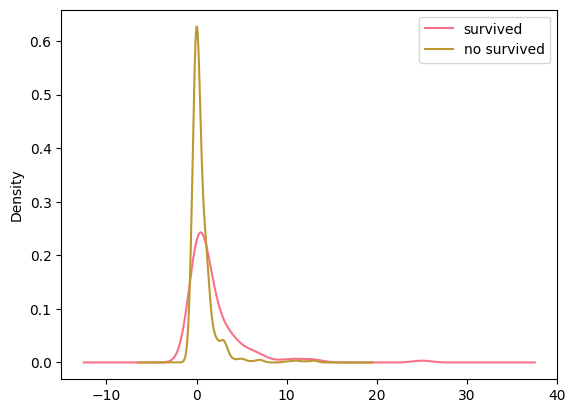

In [191]:
### on observe la répartition des classes en fonction de Survived

train[train.Survived == 1].fare_cat.plot(kind = 'density')
train[train.Survived == 0].fare_cat.plot(kind = 'density')
plt.legend(['survived', 'no survived'])

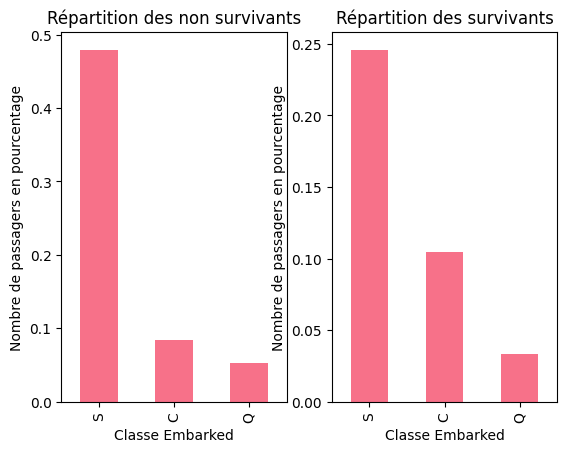

In [158]:
plt.figure()

plt.subplot(1, 2, 1)
sb.set_palette("husl")  # Choix de la palette de couleurs
(train[train.Survived == 0].Embarked.value_counts()/len(train)).plot(kind = 'bar')
plt.title('Répartition des non survivants')
plt.xlabel('Classe Embarked')
plt.ylabel('Nombre de passagers en pourcentage')

plt.subplot(1, 2, 2)
(train[train.Survived == 1].Embarked.value_counts()/len(train)).plot(kind = 'bar')
plt.title('Répartition des survivants')
plt.xlabel('Classe Embarked')
plt.ylabel('Nombre de passagers en pourcentage')

plt.show()

In [223]:
## pour Embarked on va remplacer par la valeur majoritaire, qui est : S

#----------------------- Train -------------------------------------------#

print(train.Embarked.value_counts())
train.Embarked = train.Embarked.fillna('S')
print("est-ce qu'il reste des valeurs manquantes :", train.Embarked.isna().any())

#----------------------- Test -------------------------------------------#

print(test.Embarked.value_counts())
test.Embarked = test.Embarked.fillna('S')
print("est-ce qu'il reste des valeurs manquantes :", test.Embarked.isna().any())


S    644
C    168
Q     77
Name: Embarked, dtype: int64
est-ce qu'il reste des valeurs manquantes : False
S    270
C    102
Q     46
Name: Embarked, dtype: int64
est-ce qu'il reste des valeurs manquantes : False


In [224]:
## on regroupe les prefixes des Cabin pour se concentrer sur une plus large distinction
## valeurs de Cabin en float on transforme en str
## attention les prefixes en N correspondent aux valeurs manquantes
## on a beaucoup de valeurs manquantes on va laisser cette classe

#------------------------------------------------------------------------------------------------------------------------------
#----------------------- Train -------------------------------------------#

train['Cabin_Prefix'] = train['Cabin'].apply(lambda x: str(x)[0])  # Ajustez selon le critère souhaité
train['Cabin_Prefix'].value_counts()

print(train.Cabin_Prefix.value_counts())

#------------------------------------------------------------------------------------------------------------------------------
#----------------------- Test -------------------------------------------#

test['Cabin_Prefix'] = test['Cabin'].apply(lambda x: str(x)[0])  # Ajustez selon le critère souhaité
test['Cabin_Prefix'].value_counts()

print(test.Cabin_Prefix.value_counts())


n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Prefix, dtype: int64
n    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin_Prefix, dtype: int64


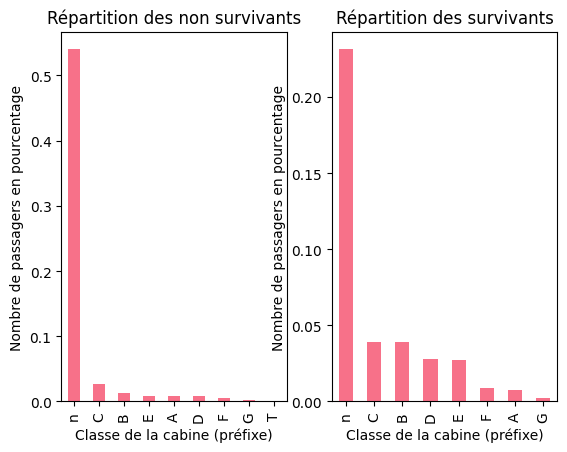

In [98]:
plt.figure()

plt.subplot(1, 2, 1)
sb.set_palette("husl")  # Choix de la palette de couleurs
(train[train.Survived == 0].Cabin_Prefix.value_counts()/len(train)).plot(kind = 'bar')
plt.title('Répartition des non survivants')
plt.xlabel('Classe de la cabine (préfixe)')
plt.ylabel('Nombre de passagers en pourcentage')

plt.subplot(1, 2, 2)
(train[train.Survived == 1].Cabin_Prefix.value_counts()/len(train)).plot(kind = 'bar')
plt.title('Répartition des survivants')
plt.xlabel('Classe de la cabine (préfixe)')
plt.ylabel('Nombre de passagers en pourcentage')

plt.show()

In [282]:
#----------------------- Train -------------------------------------------#

train['age_cat'] = train.Age.apply(lambda x : categ_age(x))
train['fare_cat'] = train.Fare.apply(lambda x : categ_fare(x))
train['Ticket_Prefix'] = train['Ticket'].apply(lambda x: x[:1])  # Ajustez selon le critère souhaité
train['Cabin_Prefix'] = train['Cabin'].apply(lambda x: str(x)[0])  # Ajustez selon le critère souhaité


#----------------------- Test -------------------------------------------#

test['age_cat'] = test.Age.apply(lambda x : categ_age(x))
test['fare_cat'] = test.Fare.apply(lambda x : categ_fare(x))
test['Ticket_Prefix'] = test['Ticket'].apply(lambda x: x[:1])  # Ajustez selon le critère souhaité
test['Cabin_Prefix'] = test['Cabin'].apply(lambda x: str(x)[0])  # Ajustez selon le critère souhaité
## on vérifie que les valeurs manquantes sont toujours telles quelles après la création de classe
## sauf pour cabine on garde les valeurs inconnues comme une nouvelle classe

train[train.Age.isna() == True].head()

dropped = ['PassengerId', 'Name', 'Age', 'Fare', 'Ticket', 'Cabin']

df_train = train.drop(dropped, axis = 1)
df_test = test.drop(dropped, axis = 1)

print(df_train.head())
df_test.head()

On va labeliser certaines colonnes sans toucher aux valeurs manquantes

## Pour la suite on ne veut pas que les valeurs manquantes de Embarked soient string donc on les convertis

df_train['Embarked'] = df_train['Embarked'].replace('nan', np.nan)
print('valeurs manquantes ?:', df_train['Embarked'].isna().any())
type(df_train[df_train['Embarked'].isna()]['Embarked'])

## on entraîne notre encoder sur les données non nulles pour garder les valeurs manquantes

knn_encode = LabelEncoder()

need_labelize = ['Sex', 'Ticket_Prefix', 'Cabin_Prefix']
    
for lab in need_labelize:
    print("variable à labeliser", lab)
    df_train[lab] = encode.fit_transform(df_train[lab].astype(str))
    df_test[lab] = encode.transform(df_test[lab].astype(str))


df_train['Embarked'] = encode.fit_transform(df_train['Embarked'])
df_test['Embarked'] = encode.transform(df_test['Embarked'])
# Récupérer les correspondances entre les labels et les classes d'origine
label_to_class = dict(zip(encode.classes_, encode.transform(encode.classes_)))

# Afficher les correspondances
print(label_to_class)

On récupère les labels de Embarked car les valeurs manquantes sont transformées, et on les récupères

df_train['Embarked'] = df_train['Embarked'].replace(3, np.nan)
df_test['Embarked'] = df_test['Embarked'].replace(3, np.nan)

## on conserve bien les valeurs manquantes

print(df_train.isna().any())
print('valeurs manquantes Embarked :\n', df_train.Embarked.isna().sum()/len(train))
print('\nvaleurs manquantes age_cat :\n',df_train.age_cat.isna().sum()/len(train))

# Question on entraîne sur train avec survived mais pas de survived dans test donc pb, or si on knn sans survived on perd une info et si on fit_transform séparemment pas même result

# Utiliser KNNImputer pour imputer les valeurs manquantes

imputer = KNNImputer()
df_train_imputed = pd.DataFrame(imputer.fit_transform(df_train), columns = [i for i in df_train])
df_test_imputed = pd.DataFrame(imputer.fit_transform(df_test), columns = [i for i in df_test])

## on vérifie qu'on a bien plus de valeurs manquantes

print(df_train_imputed.isna().any())
df_test_imputed.isna().any()


# On récupère les colonnes qui nous intéressent

In [243]:
df_train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age', 'Fare'], axis = 1)
y_train = train.Survived
#df_train = df_train.drop(['Survived'], axis = 1)

Id = test.PassengerId
df_test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age', 'Fare'], axis = 1)

print(df_train.head())
print(df_test.head())

   Survived  Pclass     Sex  SibSp  Parch Embarked Ticket_Prefix  age_cat  \
0         0       3    male      1      0        S             A        4   
1         1       1  female      1      0        C             P        7   
2         1       3  female      0      0        S             S        5   
3         1       1  female      1      0        S             1        6   
4         0       3    male      0      0        S             3        6   

   fare_cat Cabin_Prefix  
0         0            n  
1         3            C  
2         0            n  
3         2            C  
4         0            n  
   Pclass     Sex  SibSp  Parch Embarked Ticket_Prefix  age_cat  fare_cat  \
0       3    male      0      0        Q             3        6       0.0   
1       3  female      1      0        S             3        9       0.0   
2       2    male      0      0        Q             2       12       0.0   
3       3    male      0      0        S             3        5    

# On va labeliser les valeurs non numériques

In [231]:
need_labelize = ['Sex', 'Ticket_Prefix', 'Cabin_Prefix', 'Embarked']
encode = LabelEncoder()
    
for lab in need_labelize:
    print("variable à labeliser", lab)
    encode.fit(df_train[lab])
    df_train[lab] = encode.transform(df_train[lab])
    df_test[lab] = encode.transform(df_test[lab])
    

variable à labeliser Sex
variable à labeliser Ticket_Prefix
variable à labeliser Cabin_Prefix
variable à labeliser Embarked


In [232]:
print(df_train.head())
print(df_test.head())

   Survived  Pclass  Sex  SibSp  Parch  Embarked  Ticket_Prefix  age_cat  \
0         0       3    1      1      0         2              9        4   
1         1       1    0      1      0         0             13        7   
2         1       3    0      0      0         2             14        5   
3         1       1    0      1      0         2              0        6   
4         0       3    1      0      0         2              2        6   

   fare_cat  Cabin_Prefix  
0         0             8  
1         3             2  
2         0             8  
3         2             2  
4         0             8  
   Pclass  Sex  SibSp  Parch  Embarked  Ticket_Prefix  age_cat  fare_cat  \
0       3    1      0      0         1              2        6       0.0   
1       3    0      1      0         2              2        9       0.0   
2       2    1      0      0         1              1       12       0.0   
3       3    1      0      0         2              2        5       0.

# Normaliser les données

In [233]:
### On norme les données 
m = MinMaxScaler()
n_train = m.fit_transform(df_train)
print("matrice normée :" + "\n", n_train)

n_test = m.fit_transform(df_test)
print("matrice normée :" + "\n", n_test)


matrice normée :
 [[0.         1.         1.         ... 0.26666667 0.         1.        ]
 [1.         0.         0.         ... 0.46666667 0.12       0.25      ]
 [1.         1.         0.         ... 0.33333333 0.         1.        ]
 ...
 [0.         1.         0.         ... 0.33333333 0.04       1.        ]
 [1.         0.         1.         ... 0.33333333 0.04       0.25      ]
 [0.         1.         1.         ... 0.4        0.         1.        ]]
matrice normée :
 [[1.         1.         0.         ... 0.4        0.         1.        ]
 [1.         0.         0.125      ... 0.6        0.         1.        ]
 [0.5        1.         0.         ... 0.8        0.         1.        ]
 ...
 [1.         1.         0.         ... 0.46666667 0.         1.        ]
 [1.         1.         0.         ... 0.4        0.         1.        ]
 [1.         1.         0.125      ... 0.4        0.04       1.        ]]


# Matrice de corrélation pour observer l'importance des variables

matrice de corrélation :
                Survived    Pclass       Sex     SibSp     Parch  Embarked  \
Survived       1.000000 -0.338481 -0.543351 -0.035322  0.081629 -0.167675   
Pclass        -0.338481  1.000000  0.131900  0.083081  0.018443  0.162098   
Sex           -0.543351  0.131900  1.000000 -0.114631 -0.245489  0.108262   
SibSp         -0.035322  0.083081 -0.114631  1.000000  0.414838  0.068230   
Parch          0.081629  0.018443 -0.245489  0.414838  1.000000  0.039798   
Embarked      -0.167675  0.162098  0.108262  0.068230  0.039798  1.000000   
Ticket_Prefix -0.036178 -0.003277  0.031341  0.049331  0.015628 -0.058472   
age_cat       -0.067378 -0.337584  0.087931 -0.232882 -0.171021 -0.014728   
fare_cat       0.246081 -0.541144 -0.174444  0.154775  0.217267 -0.217399   
Cabin_Prefix  -0.301116  0.746616  0.123076  0.041540 -0.032548  0.194255   

               Ticket_Prefix   age_cat  fare_cat  Cabin_Prefix  
Survived           -0.036178 -0.067378  0.246081     -0.30111

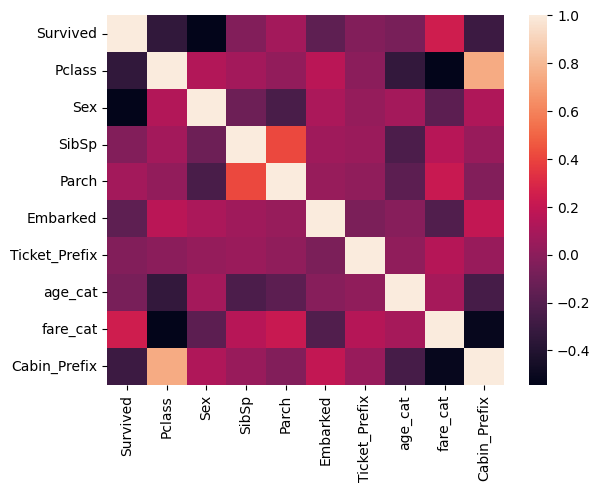

In [234]:
correlation = pd.DataFrame(n_train, columns = [i for i in df_train]).corr()
print("matrice de corrélation :" + "\n", correlation)
sb.heatmap(correlation)
plt.show()

# On va pouvoir commencer à utiliser nos modèle pour prédire

In [236]:
## on sépare notre jeu de données en train et validation

n_train = pd.DataFrame(n_train, columns = [i for i in df_train]).drop(['Survived'], axis = 1)

x_train, x_val, y_train, y_val = train_test_split(n_train, y_train, test_size = 0.3, random_state = 42)


# Logistic regression

In [237]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

pred = clf.predict(x_val)

accuracy_score(y_val, pred)

0.8097014925373134

# Random Forest

précision accuracy :  0.7835820895522388


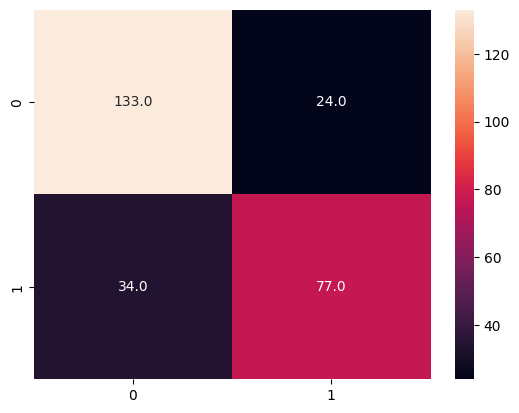

In [239]:
model1 = RandomForestClassifier(n_estimators = 100) 

model1.fit(x_train, y_train)

predictions = model1.predict(x_val)

print("précision accuracy : ",  accuracy_score(y_val, predictions))

cm = confusion_matrix(y_val, predictions)
sb.heatmap(cm,annot = True,fmt = ".1f")
plt.show()

# Arbre de décision

précision accuracy :  0.7723880597014925


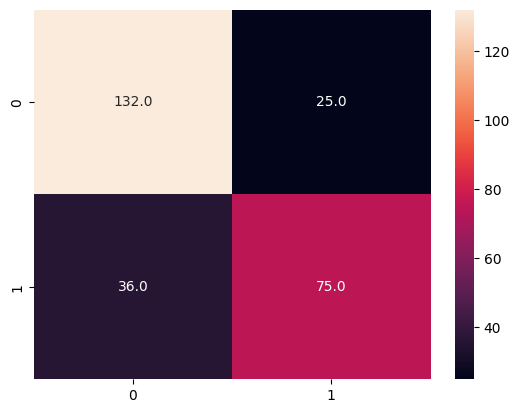

In [242]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train, y_train)

predictions = model.predict(x_val)

print("précision accuracy : ",  accuracy_score(y_val, predictions))

cm = confusion_matrix(y_val, predictions)
sb.heatmap(cm,annot = True,fmt = ".1f")
plt.show()

In [ ]:
db = pd.DataFrame(Id)
db['Surv'] = predictions
db.columns = ['PassengerId', 'Survived']
db

db.to_csv('/Users/avicenne/Documents/python/kaggle/submissions.csv', index = False)


# ----------------------- KNNImputer ----------------------------------------

# On peut gérer les valeurs manquantes avec KNNImputer qui va les remplacer par la méthode des plus proches voisins

In [386]:
from sklearn.impute import KNNImputer
IMP = KNNImputer(n_neighbors=1)
encode = LabelEncoder()

In [387]:
train = pd.read_csv('/Users/avicenne/Documents/python/kaggle/titanic/train.csv')
test = pd.read_csv('/Users/avicenne/Documents/python/kaggle/titanic/test.csv')


In [388]:
#----------------------- Train -------------------------------------------#

train['age_cat'] = train.Age.apply(lambda x : categ_age(x))
train['fare_cat'] = train.Fare.apply(lambda x : categ_fare(x))
train['Ticket_Prefix'] = train['Ticket'].apply(lambda x: x[:1])  # Ajustez selon le critère souhaité
train['Cabin_Prefix'] = train['Cabin'].apply(lambda x: str(x)[0])  # Ajustez selon le critère souhaité


#----------------------- Test -------------------------------------------#

test['age_cat'] = test.Age.apply(lambda x : categ_age(x))
test['fare_cat'] = test.Fare.apply(lambda x : categ_fare(x))
test['Ticket_Prefix'] = test['Ticket'].apply(lambda x: x[:1])  # Ajustez selon le critère souhaité
test['Cabin_Prefix'] = test['Cabin'].apply(lambda x: str(x)[0])  # Ajustez selon le critère souhaité

In [389]:

## on vérifie que les valeurs manquantes sont toujours telles quelles après la création de classe
## sauf pour cabine on garde les valeurs inconnues comme une nouvelle classe

train[train.Age.isna() == True].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat,fare_cat,Ticket_Prefix,Cabin_Prefix
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,0,3,n
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,NaN,0,2,n
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,NaN,0,2,n
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,NaN,0,2,n
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,NaN,0,3,n


In [419]:
dropped = ['PassengerId', 'Name', 'Age', 'Fare', 'Ticket', 'Cabin']

df_train = train.drop(dropped, axis = 1)
df_test = test.drop(dropped, axis = 1)

y_train = df_train['Survived']
print(y_train.isna().any())

print(df_train.head())
df_test.head()

False
   Survived  Pclass     Sex  SibSp  Parch Embarked  age_cat  fare_cat  \
0         0       3    male      1      0        S      4.0         0   
1         1       1  female      1      0        C      7.0         3   
2         1       3  female      0      0        S      5.0         0   
3         1       1  female      1      0        S      6.0         2   
4         0       3    male      0      0        S      6.0         0   

  Ticket_Prefix Cabin_Prefix  
0             A            n  
1             P            C  
2             S            n  
3             1            C  
4             3            n  


,Pclass,Sex,SibSp,Parch,Embarked,age_cat,fare_cat,Ticket_Prefix,Cabin_Prefix
0,3,male,0,0,Q,6.0,0.0,3,n
1,3,female,1,0,S,9.0,0.0,3,n
2,2,male,0,0,Q,12.0,0.0,2,n
3,3,male,0,0,S,5.0,0.0,3,n
4,3,female,1,1,S,4.0,0.0,3,n


In [420]:
## Pour la suite on ne veut pas que les valeurs manquantes de Embarked soient string donc on les convertis

df_train['Embarked'] = df_train['Embarked'].replace('nan', np.nan)
print('valeurs manquantes ?:', df_train['Embarked'].isna().any())
type(df_train[df_train['Embarked'].isna()]['Embarked'])

valeurs manquantes ?: True


pandas.core.series.Series

In [421]:
## on entraîne notre encoder sur les données non nulles pour garder les valeurs manquantes

knn_encode = LabelEncoder()

need_labelize = ['Sex', 'Ticket_Prefix', 'Cabin_Prefix']
    
for lab in need_labelize:
    print("variable à labeliser", lab)
    df_train[lab] = encode.fit_transform(df_train[lab].astype(str))
    df_test[lab] = encode.transform(df_test[lab].astype(str))


df_train['Embarked'] = encode.fit_transform(df_train['Embarked'])
df_test['Embarked'] = encode.transform(df_test['Embarked'])
# Récupérer les correspondances entre les labels et les classes d'origine
label_to_class = dict(zip(encode.classes_, encode.transform(encode.classes_)))

# Afficher les correspondances
print(label_to_class)

variable à labeliser Sex
variable à labeliser Ticket_Prefix
variable à labeliser Cabin_Prefix
{'C': 0, 'Q': 1, 'S': 2, nan: 3}


In [422]:
#On récupère les labels de Embarked car les valeurs manquantes sont transformées, et on les récupères

df_train['Embarked'] = df_train['Embarked'].replace(3, np.nan)
df_test['Embarked'] = df_test['Embarked'].replace(3, np.nan)

In [423]:
## on conserve bien les valeurs manquantes

print(df_train.isna().any())
print('valeurs manquantes Embarked :\n', df_train.Embarked.isna().sum()/len(train))
print('\nvaleurs manquantes age_cat :\n',df_train.age_cat.isna().sum()/len(train))


Survived         False
Pclass           False
Sex              False
SibSp            False
Parch            False
Embarked          True
age_cat           True
fare_cat         False
Ticket_Prefix    False
Cabin_Prefix     False
dtype: bool
valeurs manquantes Embarked :
 0.002244668911335578

valeurs manquantes age_cat :
 0.19865319865319866


# Question on entraîne sur train avec survived mais pas de survived dans test donc pb, or si on knn sans survived on perd une info et si on fit_transform séparemment pas même result


In [424]:

# Utiliser KNNImputer pour imputer les valeurs manquantes

imputer = KNNImputer()
df_train_imputed = pd.DataFrame(imputer.fit_transform(df_train), columns = [i for i in df_train])
df_test_imputed = pd.DataFrame(imputer.fit_transform(df_test), columns = [i for i in df_test])


In [425]:
## on vérifie qu'on a bien plus de valeurs manquantes

print(df_train_imputed.isna().any())
df_test_imputed.isna().any()

Survived         False
Pclass           False
Sex              False
SibSp            False
Parch            False
Embarked         False
age_cat          False
fare_cat         False
Ticket_Prefix    False
Cabin_Prefix     False
dtype: bool


Pclass           False
Sex              False
SibSp            False
Parch            False
Embarked         False
age_cat          False
fare_cat         False
Ticket_Prefix    False
Cabin_Prefix     False
dtype: bool

matrice de corrélation :
                Survived    Pclass       Sex     SibSp     Parch  Embarked  \
Survived       1.000000 -0.338481 -0.543351 -0.035322  0.081629 -0.171495   
Pclass        -0.338481  1.000000  0.131900  0.083081  0.018443  0.166855   
Sex           -0.543351  0.131900  1.000000 -0.114631 -0.245489  0.112405   
SibSp         -0.035322  0.083081 -0.114631  1.000000  0.414838  0.069657   
Parch          0.081629  0.018443 -0.245489  0.414838  1.000000  0.041245   
Embarked      -0.171495  0.166855  0.112405  0.069657  0.041245  1.000000   
age_cat       -0.088268 -0.387537  0.147238 -0.320179 -0.212818 -0.037605   
fare_cat       0.246081 -0.541144 -0.174444  0.154775  0.217267 -0.220835   
Ticket_Prefix -0.036178 -0.003277  0.031341  0.049331  0.015628 -0.055767   
Cabin_Prefix  -0.301116  0.746616  0.123076  0.041540 -0.032548  0.201351   

                age_cat  fare_cat  Ticket_Prefix  Cabin_Prefix  
Survived      -0.088268  0.246081      -0.036178     -0.30111

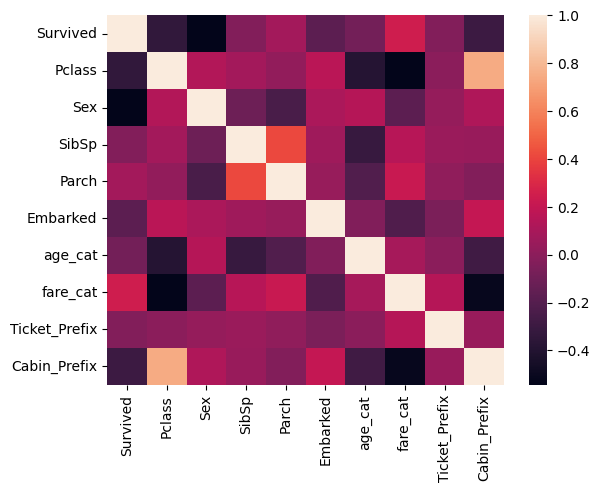

In [426]:
correlation = df_train_imputed.corr()
print("matrice de corrélation :" + "\n", correlation)
sb.heatmap(correlation)
plt.show()

# On normalise

In [427]:
### On norme les données 
m = MinMaxScaler()
n_train = m.fit_transform(df_train_imputed)
print("matrice normée train :" + "\n", n_train)

n_test = m.fit_transform(df_test_imputed)
print("matrice normée test :" + "\n", n_test)

matrice normée train :
 [[0.         1.         1.         ... 0.         0.6        1.        ]
 [1.         0.         0.         ... 0.12       0.86666667 0.25      ]
 [1.         1.         0.         ... 0.         0.93333333 1.        ]
 ...
 [0.         1.         0.         ... 0.04       1.         1.        ]
 [1.         0.         1.         ... 0.04       0.         0.25      ]
 [0.         1.         1.         ... 0.         0.13333333 1.        ]]
matrice normée test :
 [[1.         1.         0.         ... 0.         0.13333333 1.        ]
 [1.         0.         0.125      ... 0.         0.13333333 1.        ]
 [0.5        1.         0.         ... 0.         0.06666667 1.        ]
 ...
 [1.         1.         0.         ... 0.         0.93333333 1.        ]
 [1.         1.         0.         ... 0.         0.13333333 1.        ]
 [1.         1.         0.125      ... 0.04       0.06666667 1.        ]]


In [428]:
len(n_train)

891

# Split et train

In [430]:
## On reconvertit les numpy en DataFrame

n_train = pd.DataFrame(n_train, columns = [i for i in df_train_imputed])

n_train = n_train.drop(['Survived'], axis = 1)

n_test = pd.DataFrame(n_test, columns = [i for i in df_test_imputed])

print(n_train.head())
n_test.head()

   Pclass  Sex  SibSp  Parch  Embarked   age_cat  fare_cat  Ticket_Prefix  \
0     1.0  1.0  0.125    0.0       1.0  0.266667      0.00       0.600000   
1     0.0  0.0  0.125    0.0       0.0  0.466667      0.12       0.866667   
2     1.0  0.0  0.000    0.0       1.0  0.333333      0.00       0.933333   
3     0.0  0.0  0.125    0.0       1.0  0.400000      0.08       0.000000   
4     1.0  1.0  0.000    0.0       1.0  0.400000      0.00       0.133333   

   Cabin_Prefix  
0          1.00  
1          0.25  
2          1.00  
3          0.25  
4          1.00  


,Pclass,Sex,SibSp,Parch,Embarked,age_cat,fare_cat,Ticket_Prefix,Cabin_Prefix
0,1.0,1.0,0.000,0.000000,0.5,0.400000,0.0,0.133333,1.0
1,1.0,0.0,0.125,0.000000,1.0,0.600000,0.0,0.133333,1.0
2,0.5,1.0,0.000,0.000000,0.5,0.800000,0.0,0.066667,1.0
3,1.0,1.0,0.000,0.000000,1.0,0.333333,0.0,0.133333,1.0
4,1.0,0.0,0.125,0.111111,1.0,0.266667,0.0,0.133333,1.0


In [431]:
## on sépare notre jeu de données en train et validation

x_train, x_val, y_train, y_val = train_test_split(n_train, y_train, test_size = 0.3, random_state = 42)


# Regression

In [432]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

pred = clf.predict(x_val)

accuracy_score(y_val, pred)

0.8171641791044776

# Random forest

précision accuracy :  0.7985074626865671


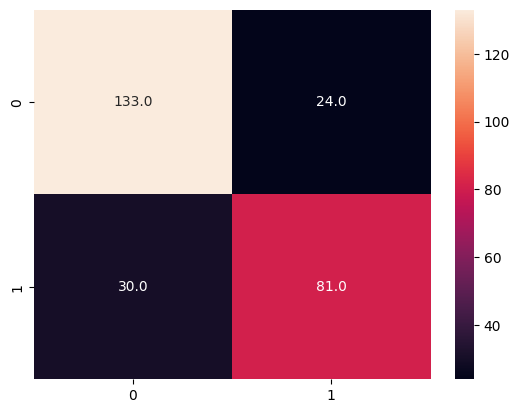

In [433]:
model1 = RandomForestClassifier(n_estimators = 100) 

model1.fit(x_train, y_train)

predictions = model1.predict(x_val)

print("précision accuracy : ",  accuracy_score(y_val, predictions))

cm = confusion_matrix(y_val, predictions)
sb.heatmap(cm,annot = True,fmt = ".1f")
plt.show()

# Decision Tree

précision accuracy :  0.75


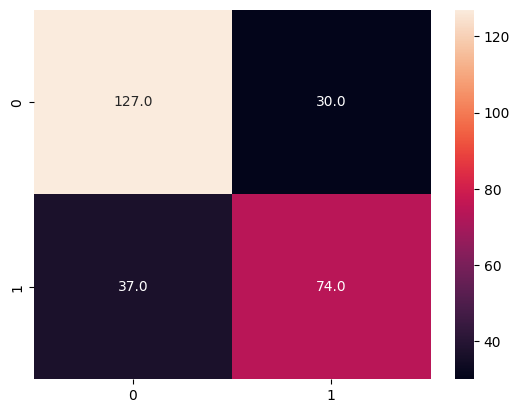

In [434]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train, y_train)

predictions = model.predict(x_val)

print("précision accuracy : ",  accuracy_score(y_val, predictions))

cm = confusion_matrix(y_val, predictions)
sb.heatmap(cm,annot = True,fmt = ".1f")
plt.show()